# Introdiction to Artificial intelligence<br>
## introduction
The purpose of project is to predict missing data in the dataset. <br>
<p>In this projcet we have a dataset which has 10 features that we have to choose <br>
one of them as our input to do this we draw diagram of normal distribution of each one <br>
then we choose one of them. In next step according to the selected feature we assign 1 or 0 <br>
to the "Clicked on Ad" feature which is our output. And this is our prediction.</p>

## part 1
In this part <br>
- The dataset is loaded.
- Then first 5 rows of dataset are displayed.
- Then last 5 rows of dataset are displayed.
- Then Information like count of values, average(mean), min and max value, standard deviation(std) and percentiles are displayed.

In [573]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import time
%matplotlib inline

data_frame = pd.read_csv('advertising_dataset.csv')

display(data_frame.head())
display(data_frame.tail())
display(data_frame.describe())


,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,0.0
1,1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,0.0
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,0.0
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,0.0
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,0.0


,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
995,995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,2016-02-11 21:49:00,1.0
996,996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,2016-02-01 17:24:57,1.0
998,998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,2016-03-24 02:35:54,0.0
999,999,NaN,26.0,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,Female,Brazil,2016-06-03 21:43:21,1.0


,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,1000.000000,907.000000,979.000000,1000.000000,913.000000,832.000000
mean,499.500000,64.794818,36.009193,55000.000080,179.751271,0.496394
std,288.819436,15.954841,8.783636,13414.634022,43.957934,0.500288
min,0.000000,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,249.750000,50.615000,29.000000,47031.802500,138.550000,0.000000
50%,499.500000,67.940000,35.000000,57012.300000,183.480000,0.000000
75%,749.250000,78.555000,42.000000,65470.635000,217.850000,1.000000
max,999.000000,91.430000,61.000000,79484.800000,269.960000,1.000000


## part 2
In this part <br>
- Data type of each column is displayed.<br>
- In Gender column 'Female' is replaced with 0 and 'Male' by 1. <br>
- To make sure giving lable to Gender column works, first 5 rows of data set are displayed.

In [574]:
display(data_frame.info())

data_frame['Gender'] = data_frame['Gender'].map({'Female': 0, 'Male': 1, 0: 0, 1: 1})
display(data_frame.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  907 non-null    float64
 2   Age                       979 non-null    float64
 3   Area Income               1000 non-null   float64
 4   Daily Internet Usage      913 non-null    float64
 5   Ad Topic Line             1000 non-null   object 
 6   City                      1000 non-null   object 
 7   Gender                    1000 non-null   object 
 8   Country                   1000 non-null   object 
 9   Timestamp                 1000 non-null   object 
 10  Clicked on Ad             832 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 66.5+ KB


None

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0


## part 3
In this part <br>
- To solve problem NaN values, in first solution we replace NaN values of each column with average of that column.<br>
- There are 3 main methods for handling missing data.<br>
1. Deletion of missing data of dataset:<br>
In small datasets it's not good idea to use this method. It may decrease accuracy thereupon. But if<br>
the dataset is huge it is fine to use this method specially if missing values are in identical rows.
2. Replacement with statistical values:
In this method missing values will be replaced with statistical values like mean, median or mode.<br>
Choosing between mean and median and mode depends on distribution of values in dataset. For example<br>
If we have fairly high number of outliers in our dataset It is better to use replacement with median<br>
rather than mean. Otherwise replacement with mean is better.
3. Model-based methods.:
In this method if we have missing values in in a feature we assume this feature as our output<br>
and give other features as our inputs to the training model. Then we predict the missing ones.<br>
By having missing values in a number of features his method could takes more time and calculational<br>
effort than other methods because we need to run model for each feature. In huge datasets this method <br>
takes a lot of time.

In [575]:
clicked_on_ad_col = data_frame['Clicked on Ad']

print("Number of NaN values of each column")
display(data_frame.isna().sum())

data_frame = data_frame.fillna(data_frame.mean())
data_frame['Clicked on Ad'] = clicked_on_ad_col

Number of NaN values of each column


Unnamed: 0                    0
Daily Time Spent on Site     93
Age                          21
Area Income                   0
Daily Internet Usage         87
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64

## part 4
In this part <br>
- Number of female and male users are displayed.<br>
- Number of users who clicked on Ad and who dont are displayed. <br>

In [576]:
print('Number of female users:')
display(data_frame['Gender'].value_counts()[0])
print('Number of female users:')
display(data_frame['Gender'].value_counts()[1])

print('Number of users who clicked on Ad:')
display(data_frame['Clicked on Ad'].value_counts()[1])
print('Number of users dont who clicked on Ad:')
display(data_frame['Clicked on Ad'].value_counts()[0])

Number of female users:


519

Number of female users:


481

Number of users who clicked on Ad:


413

Number of users dont who clicked on Ad:


419

## part 5
In this part <br>
- Number of older users with same gender as me is displayed.<br>

In [577]:
data_frame_with_condition = data_frame.apply(lambda x : True if x['Gender'] == 1 and x['Age'] > 20 else False, axis = 1)
num_of_rows = len(data_frame_with_condition[data_frame_with_condition == True].index)

print('Number of older users with same gender as me:')
print(num_of_rows)


Number of older users with same gender as me:
472


## part 6
In this part <br>
- Average age of users who clicked on Ad and who dont is calculated using vectorization.<br>
- The time it takes also is displayed. <br> 

In [578]:
time1_1 = time.time()

averages_of_users = data_frame.groupby('Clicked on Ad').mean()

time1_2 = time.time()

print('Average age of who clicked on Ad:')
display(averages_of_users['Age'][1])
print('Average age of who dont clicked on Ad:')
display(averages_of_users['Age'][0])
print("Time(vectorization): %f ms" % ((time1_2 - time1_1) * 1000))

Average age of who clicked on Ad:


40.295599848637366

Average age of who dont clicked on Ad:


31.723325881701896

Time(vectorization): 5.001068 ms


## part 7
In this part <br>
- Average age of users who clicked on Ad and who dont is calculated using for loop.<br>
- The time it takes also is displayed. <br> 

In [579]:
time2_1 = time.time()

click_average = 0
num1 = 0
not_click_average = 0
num2 = 0
for i in range(1000):
    if data_frame['Clicked on Ad'][i] == 1:
        click_average += data_frame['Age'][i]
        num1 += 1
    else:
        if data_frame['Clicked on Ad'][i] == 0:
            not_click_average += data_frame['Age'][i]
            num2 += 1
        
click_average /= num1
not_click_average /= num2

time2_2 = time.time()

print('Average age of who clicked on Ad:')
display(click_average)
print('Average age of who dont clicked on Ad:')
display(not_click_average)
print("Time(for loop): %f ms" % ((time2_2 - time2_1) * 1000))


Average age of who clicked on Ad:


40.295599848637366

Average age of who dont clicked on Ad:


31.723325881701896

Time(for loop): 40.008783 ms


## Analysis
By run 2 previous cells we can see that using vectorization we get a time nearly 4 ms <br> and using for loop we get a time nearly 35 ms. (5 to 8 times faster)

## part 8
In this part <br>
- We draw distribution of each column.

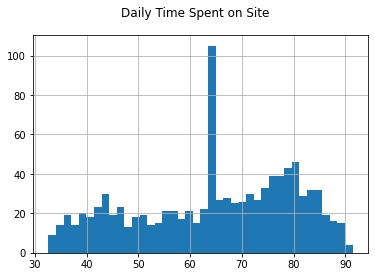

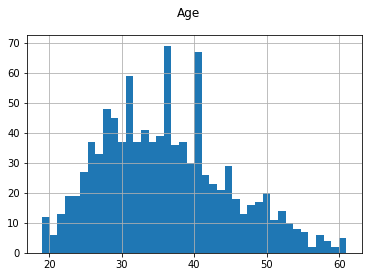

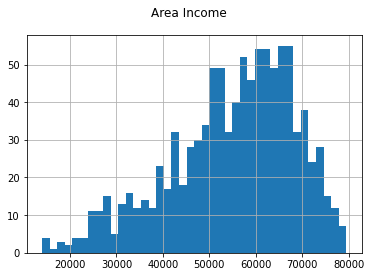

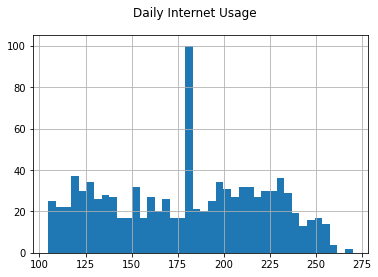

In [580]:
numerical_fields = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
for field in numerical_fields:
    fig = plt.figure()
    fig.suptitle(field)
    data_frame[field].hist(bins=40)


## part 9
In this part <br>
- We normalize our data.
- Normalized data is displayed

In [581]:
for field in numerical_fields:
    mean = data_frame[field].mean()
    std = data_frame[field].std()
    
    data_frame[field] -= mean
    data_frame[field] /= std

display(data_frame)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,0.273474,-0.116122,0.509436,1.817578,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,1,1.015870,-0.576377,1.002029,0.000000,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,2,0.307698,-1.151696,0.356770,1.351152,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,3,0.615713,-0.806505,-0.014448,1.574722,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,4,0.235301,-0.116122,1.408163,1.091154,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.538051,-0.691441,1.221395,0.686394,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1.0
996,996,-0.888164,1.034517,0.952853,-1.079309,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,997,-0.866445,1.724900,-0.938101,-1.413831,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1.0
998,998,-0.608450,-1.957144,-0.974996,0.195207,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0.0


## part 10
In this part <br>
- We find mean and std for each numerical field for users who clicked on Ad and who dont.
- Using the mean and std for each numerical field we find pdf for normail distribution
- At last using pdf we plot normal distribution.<br>
Blue diagram is for users who dont click on Ad<br>
And orange diagram is for users who dont click on Ad<br>

Blue diagram is for users who dont click on Ad.
Orange diagram is for users who click on Ad.


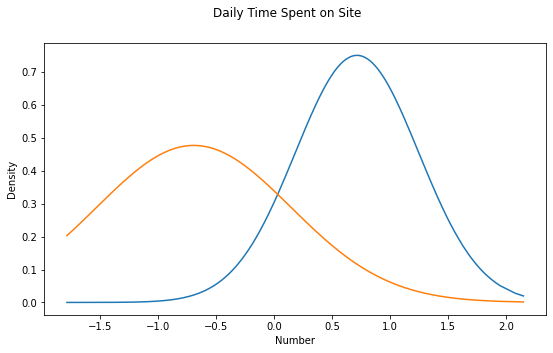

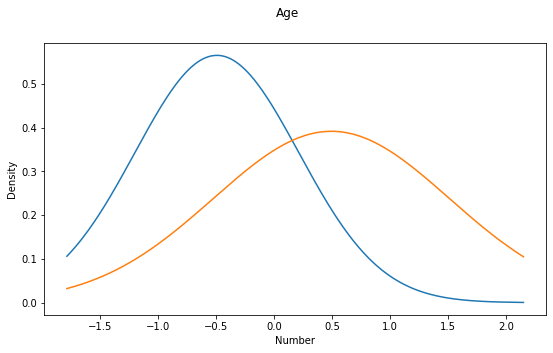

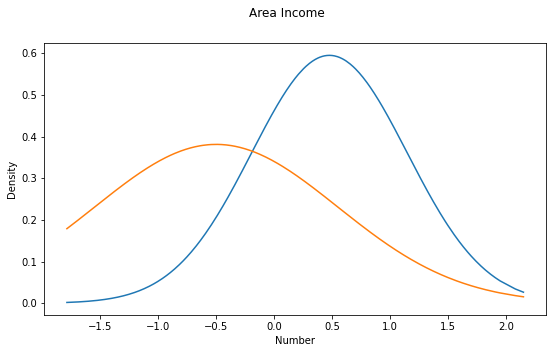

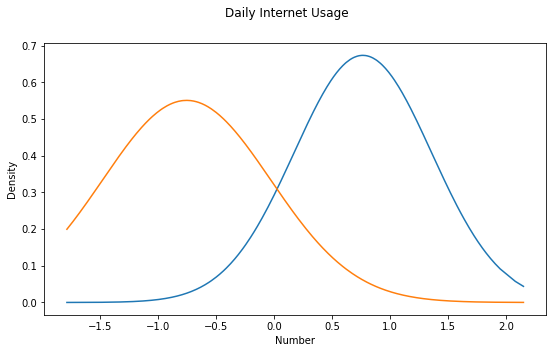

In [582]:
average = data_frame.groupby('Clicked on Ad').mean()
std = data_frame.groupby('Clicked on Ad').std()

print("Blue diagram is for users who dont click on Ad.")
print("Orange diagram is for users who click on Ad.")
for field in numerical_fields:
    x0 = sorted(data_frame['Daily Internet Usage'])
    x1 = x0
    
    pdf0 = stats.norm.pdf(x0, average[field][0], std[field][0])
    pdf1 = stats.norm.pdf(x1, average[field][1], std[field][1])
    
    fig = plt.figure()
    fig.suptitle(field)
    fig.set_size_inches(9, 5)
    
    plt.plot(x0, pdf0)
    plt.plot(x1, pdf1)
    plt.xlabel('Number')
    plt.ylabel('Density')
    plt.show()


## Analysis
We can see users who click on Ad and who dont, have most difference and less overlapping in "Daily internet usage" field.<br>
Actualy difference of these 2 types of users are more distinguishable in this field rather than other.<br>
So we choose this as our input.

## part 11
In this part <br>
- We use mean and std of "Daily internet usage" to find probability of each row in each pdf.
- then we compare probabilities.
- if probabaility in pdf0 is higher we assign 0 and otherwise 1.

In [583]:
selected_field = 'Daily Internet Usage'

selected_average0 = average[field][0]
selected_average1 = average[field][1]

selected_std0 = std[field][0]
selected_std1 = std[field][1]

null_data_frame = data_frame[data_frame['Clicked on Ad'].isnull()].copy()

for i in range(len(null_data_frame)):
    index = null_data_frame.index[i]
    if null_data_frame['Clicked on Ad'][index] != 1 and null_data_frame['Clicked on Ad'][index] != 0:
        probability0 = stats.norm(selected_average0, selected_std0).pdf(null_data_frame[selected_field][index])
        probability1 = stats.norm(selected_average1, selected_std1).pdf(null_data_frame[selected_field][index])
        if probability0 > probability1:
            null_data_frame.loc[index, 'Clicked on Ad'] = 0
        else:
            null_data_frame.loc[index, 'Clicked on Ad'] = 1

null_data_frame['Clicked on Ad'].to_csv('output.csv')